In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
plt.rcParams.update({'mathtext.default':'regular'})

In [2]:
sim4_random_df = pd.read_csv('SIM-4 Networked, Reactive, Random-table.csv',skiprows=6)
sim4_random_df.drop(['logit-normal-mu', 'Enforcement-Strategy',
       'Inspection-Strategy', '#-Inspectors', '%-Escalate',
       'avg-violations-conscious', '%-Criminal-Offenders',
       '#-Inspections-per-Inspector', '%-Unintentional-Offenders',
       '%-Conscious-Offenders', 'avg-violations-unintentional',
       'radius-of-peers', 'length-of-run', 'logit-normal-sigma',
       '%-Deescalate', 'React-to-Inspections', '#-Inspectees',
       'React-to-Peer-Pressure', 'React-to-Enforcement',
       'avg-violations-criminal', '%-Random-Inspections',
       '%-Compliant-Inspectees', 'count inspectees with [absorbance-capacity < .1]',
       'count inspectees with [absorbance-capacity < .2 and absorbance-capacity >= .1]',
       'count inspectees with [absorbance-capacity < .3 and absorbance-capacity >= .2]',
       'count inspectees with [absorbance-capacity < .4 and absorbance-capacity >= .3]',
       'count inspectees with [absorbance-capacity < .5 and absorbance-capacity >= .4]',
       'count inspectees with [absorbance-capacity < .6 and absorbance-capacity >= .5]',
       'count inspectees with [absorbance-capacity < .7 and absorbance-capacity >= .6]',
       'count inspectees with [absorbance-capacity < .8 and absorbance-capacity >= .7]',
       'count inspectees with [absorbance-capacity < .9 and absorbance-capacity >= .8]',
       'count inspectees with [absorbance-capacity <= 1 and absorbance-capacity >= .9]'], inplace=True, axis=1)
sim4_random_df = sim4_random_df.rename(columns={'[step]': 'step', '[run number]':'run'})
sim4_random_df['total-inspectees'] = sim4_random_df['#-compliant-inspectees'] + sim4_random_df['#-unintentional-violators'] + sim4_random_df['#-conscious-violators'] + sim4_random_df['#-criminal-violators'] 
sim4_random_df['perc-compliant'] = sim4_random_df['#-compliant-inspectees'] / sim4_random_df['total-inspectees'] * 100
sim4_random_df['perc-compliant'] = sim4_random_df['perc-compliant'].fillna(0)
sim4_random_df['perc-unintentional'] = sim4_random_df['#-unintentional-violators'] / sim4_random_df['total-inspectees'] * 100
sim4_random_df['perc-unintentional'] = sim4_random_df['perc-unintentional'].fillna(0)
sim4_random_df['perc-conscious'] = sim4_random_df['#-conscious-violators'] / sim4_random_df['total-inspectees'] * 100
sim4_random_df['perc-conscious'] = sim4_random_df['perc-conscious'].fillna(0)
sim4_random_df['perc-criminal'] = sim4_random_df['#-criminal-violators'] / sim4_random_df['total-inspectees'] * 100
sim4_random_df['perc-criminal'] = sim4_random_df['perc-criminal'].fillna(0)
sim4_random_df['perc-noncompliant'] = (sim4_random_df['perc-unintentional'] + sim4_random_df['perc-conscious'] + sim4_random_df['perc-criminal']) 
sim4_random_step_mean = sim4_random_df.groupby(['step'], as_index=False).mean()
sim4_random_step_mean = sim4_random_step_mean.rename(columns={'avg-compliance-rate': 'avg-compliance-rate-mean', 
                                                    'perc-compliant':'perc-compliant-mean', 
                                                    'perc-unintentional':'perc-unintentional-mean',
                                                    'perc-conscious': 'perc-conscious-mean',
                                                    'perc-criminal': 'perc-criminal-mean',
                                                    'perc-noncompliant': 'perc-noncompliant-mean'})
sim4_random_step_std = sim4_random_df.groupby(['step'], as_index=False).std()
sim4_random_step_std = sim4_random_step_std.rename(columns={'avg-compliance-rate': 'avg-compliance-rate-std', 
                                                    'perc-compliant':'perc-compliant-std', 
                                                    'perc-unintentional':'perc-unintentional-std',
                                                    'perc-conscious': 'perc-conscious-std',
                                                    'perc-criminal': 'perc-criminal-std',
                                                    'perc-noncompliant': 'perc-noncompliant-std'})

In [3]:
sim4_risknoncomp_df = pd.read_csv('SIM-4 Networked, Reactive, Risk non-compliant-table.csv',skiprows=6)
sim4_risknoncomp_df.drop(['logit-normal-mu', 'Enforcement-Strategy',
       'Inspection-Strategy', '#-Inspectors', '%-Escalate',
       'avg-violations-conscious', '%-Criminal-Offenders',
       '#-Inspections-per-Inspector', '%-Unintentional-Offenders',
       '%-Conscious-Offenders', 'avg-violations-unintentional',
       'radius-of-peers', 'length-of-run', 'logit-normal-sigma',
       '%-Deescalate', 'React-to-Inspections', '#-Inspectees',
       'React-to-Peer-Pressure', 'React-to-Enforcement',
       'avg-violations-criminal', '%-Random-Inspections',
       '%-Compliant-Inspectees', 'count inspectees with [absorbance-capacity < .1]',
       'count inspectees with [absorbance-capacity < .2 and absorbance-capacity >= .1]',
       'count inspectees with [absorbance-capacity < .3 and absorbance-capacity >= .2]',
       'count inspectees with [absorbance-capacity < .4 and absorbance-capacity >= .3]',
       'count inspectees with [absorbance-capacity < .5 and absorbance-capacity >= .4]',
       'count inspectees with [absorbance-capacity < .6 and absorbance-capacity >= .5]',
       'count inspectees with [absorbance-capacity < .7 and absorbance-capacity >= .6]',
       'count inspectees with [absorbance-capacity < .8 and absorbance-capacity >= .7]',
       'count inspectees with [absorbance-capacity < .9 and absorbance-capacity >= .8]',
       'count inspectees with [absorbance-capacity <= 1 and absorbance-capacity >= .9]'], inplace=True, axis=1)
sim4_risknoncomp_df = sim4_risknoncomp_df.rename(columns={'[step]': 'step', '[run number]':'run'})
sim4_risknoncomp_df['total-inspectees'] = sim4_risknoncomp_df['#-compliant-inspectees'] + sim4_risknoncomp_df['#-unintentional-violators'] + sim4_risknoncomp_df['#-conscious-violators'] + sim4_risknoncomp_df['#-criminal-violators'] 
sim4_risknoncomp_df['perc-compliant'] = sim4_risknoncomp_df['#-compliant-inspectees'] / sim4_risknoncomp_df['total-inspectees'] * 100
sim4_risknoncomp_df['perc-compliant'] = sim4_risknoncomp_df['perc-compliant'].fillna(0)
sim4_risknoncomp_df['perc-unintentional'] = sim4_risknoncomp_df['#-unintentional-violators'] / sim4_risknoncomp_df['total-inspectees'] * 100
sim4_risknoncomp_df['perc-unintentional'] = sim4_risknoncomp_df['perc-unintentional'].fillna(0)
sim4_risknoncomp_df['perc-conscious'] = sim4_risknoncomp_df['#-conscious-violators'] / sim4_risknoncomp_df['total-inspectees'] * 100
sim4_risknoncomp_df['perc-conscious'] = sim4_risknoncomp_df['perc-conscious'].fillna(0)
sim4_risknoncomp_df['perc-criminal'] = sim4_risknoncomp_df['#-criminal-violators'] / sim4_risknoncomp_df['total-inspectees'] * 100
sim4_risknoncomp_df['perc-criminal'] = sim4_risknoncomp_df['perc-criminal'].fillna(0)
sim4_risknoncomp_df['perc-noncompliant'] = (sim4_risknoncomp_df['perc-unintentional'] + sim4_risknoncomp_df['perc-conscious'] + sim4_risknoncomp_df['perc-criminal']) 
sim4_risknoncomp_step_mean = sim4_risknoncomp_df.groupby(['step'], as_index=False).mean()
sim4_risknoncomp_step_mean = sim4_risknoncomp_step_mean.rename(columns={'avg-compliance-rate': 'avg-compliance-rate-mean', 
                                                    'perc-compliant':'perc-compliant-mean', 
                                                    'perc-unintentional':'perc-unintentional-mean',
                                                    'perc-conscious': 'perc-conscious-mean',
                                                    'perc-criminal': 'perc-criminal-mean',
                                                    'perc-noncompliant': 'perc-noncompliant-mean'})
sim4_risknoncomp_step_std = sim4_risknoncomp_df.groupby(['step'], as_index=False).std()
sim4_risknoncomp_step_std = sim4_risknoncomp_step_std.rename(columns={'avg-compliance-rate': 'avg-compliance-rate-std', 
                                                    'perc-compliant':'perc-compliant-std', 
                                                    'perc-unintentional':'perc-unintentional-std',
                                                    'perc-conscious': 'perc-conscious-std',
                                                    'perc-criminal': 'perc-criminal-std',
                                                    'perc-noncompliant': 'perc-noncompliant-std'})

In [4]:
sim4_riskoffense_df = pd.read_csv('SIM-4 Networked, Reactive, Risk offense-table.csv',skiprows=6)
sim4_riskoffense_df.drop(['logit-normal-mu', 'Enforcement-Strategy',
       'Inspection-Strategy', '#-Inspectors', '%-Escalate',
       'avg-violations-conscious', '%-Criminal-Offenders',
       '#-Inspections-per-Inspector', '%-Unintentional-Offenders',
       '%-Conscious-Offenders', 'avg-violations-unintentional',
       'radius-of-peers', 'length-of-run', 'logit-normal-sigma',
       '%-Deescalate', 'React-to-Inspections', '#-Inspectees',
       'React-to-Peer-Pressure', 'React-to-Enforcement',
       'avg-violations-criminal', '%-Random-Inspections',
       '%-Compliant-Inspectees', 'count inspectees with [absorbance-capacity < .1]',
       'count inspectees with [absorbance-capacity < .2 and absorbance-capacity >= .1]',
       'count inspectees with [absorbance-capacity < .3 and absorbance-capacity >= .2]',
       'count inspectees with [absorbance-capacity < .4 and absorbance-capacity >= .3]',
       'count inspectees with [absorbance-capacity < .5 and absorbance-capacity >= .4]',
       'count inspectees with [absorbance-capacity < .6 and absorbance-capacity >= .5]',
       'count inspectees with [absorbance-capacity < .7 and absorbance-capacity >= .6]',
       'count inspectees with [absorbance-capacity < .8 and absorbance-capacity >= .7]',
       'count inspectees with [absorbance-capacity < .9 and absorbance-capacity >= .8]',
       'count inspectees with [absorbance-capacity <= 1 and absorbance-capacity >= .9]'], inplace=True, axis=1)
sim4_riskoffense_df = sim4_riskoffense_df.rename(columns={'[step]': 'step', '[run number]':'run'})
sim4_riskoffense_df['total-inspectees'] = sim4_riskoffense_df['#-compliant-inspectees'] + sim4_riskoffense_df['#-unintentional-violators'] + sim4_riskoffense_df['#-conscious-violators'] + sim4_riskoffense_df['#-criminal-violators'] 
sim4_riskoffense_df['perc-compliant'] = sim4_riskoffense_df['#-compliant-inspectees'] / sim4_riskoffense_df['total-inspectees'] * 100
sim4_riskoffense_df['perc-compliant'] = sim4_riskoffense_df['perc-compliant'].fillna(0)
sim4_riskoffense_df['perc-unintentional'] = sim4_riskoffense_df['#-unintentional-violators'] / sim4_riskoffense_df['total-inspectees'] * 100
sim4_riskoffense_df['perc-unintentional'] = sim4_riskoffense_df['perc-unintentional'].fillna(0)
sim4_riskoffense_df['perc-conscious'] = sim4_riskoffense_df['#-conscious-violators'] / sim4_riskoffense_df['total-inspectees'] * 100
sim4_riskoffense_df['perc-conscious'] = sim4_riskoffense_df['perc-conscious'].fillna(0)
sim4_riskoffense_df['perc-criminal'] = sim4_riskoffense_df['#-criminal-violators'] / sim4_riskoffense_df['total-inspectees'] * 100
sim4_riskoffense_df['perc-criminal'] = sim4_riskoffense_df['perc-criminal'].fillna(0)
sim4_riskoffense_df['perc-noncompliant'] = (sim4_riskoffense_df['perc-unintentional'] + sim4_riskoffense_df['perc-conscious'] + sim4_riskoffense_df['perc-criminal']) 
sim4_riskoffense_step_mean = sim4_riskoffense_df.groupby(['step'], as_index=False).mean()
sim4_riskoffense_step_mean = sim4_riskoffense_step_mean.rename(columns={'avg-compliance-rate': 'avg-compliance-rate-mean', 
                                                    'perc-compliant':'perc-compliant-mean', 
                                                    'perc-unintentional':'perc-unintentional-mean',
                                                    'perc-conscious': 'perc-conscious-mean',
                                                    'perc-criminal': 'perc-criminal-mean',
                                                    'perc-noncompliant': 'perc-noncompliant-mean'})
sim4_riskoffense_step_std = sim4_riskoffense_df.groupby(['step'], as_index=False).std()
sim4_riskoffense_step_std = sim4_riskoffense_step_std.rename(columns={'avg-compliance-rate': 'avg-compliance-rate-std', 
                                                    'perc-compliant':'perc-compliant-std', 
                                                    'perc-unintentional':'perc-unintentional-std',
                                                    'perc-conscious': 'perc-conscious-std',
                                                    'perc-criminal': 'perc-criminal-std',
                                                    'perc-noncompliant': 'perc-noncompliant-std'})

In [6]:
sim4_mixnoncomp_df = pd.read_csv('SIM-4 Networked, Reactive, Mix 50 random, 50 risk non-compliant-table.csv',skiprows=6)
sim4_mixnoncomp_df.drop(['logit-normal-mu', 'Enforcement-Strategy',
       'Inspection-Strategy', '#-Inspectors', '%-Escalate',
       'avg-violations-conscious', '%-Criminal-Offenders',
       '#-Inspections-per-Inspector', '%-Unintentional-Offenders',
       '%-Conscious-Offenders', 'avg-violations-unintentional',
       'radius-of-peers', 'length-of-run', 'logit-normal-sigma',
       '%-Deescalate', 'React-to-Inspections', '#-Inspectees',
       'React-to-Peer-Pressure', 'React-to-Enforcement',
       'avg-violations-criminal', '%-Random-Inspections',
       '%-Compliant-Inspectees', 'count inspectees with [absorbance-capacity < .1]',
       'count inspectees with [absorbance-capacity < .2 and absorbance-capacity >= .1]',
       'count inspectees with [absorbance-capacity < .3 and absorbance-capacity >= .2]',
       'count inspectees with [absorbance-capacity < .4 and absorbance-capacity >= .3]',
       'count inspectees with [absorbance-capacity < .5 and absorbance-capacity >= .4]',
       'count inspectees with [absorbance-capacity < .6 and absorbance-capacity >= .5]',
       'count inspectees with [absorbance-capacity < .7 and absorbance-capacity >= .6]',
       'count inspectees with [absorbance-capacity < .8 and absorbance-capacity >= .7]',
       'count inspectees with [absorbance-capacity < .9 and absorbance-capacity >= .8]',
       'count inspectees with [absorbance-capacity <= 1 and absorbance-capacity >= .9]'], inplace=True, axis=1)
sim4_mixnoncomp_df = sim4_mixnoncomp_df.rename(columns={'[step]': 'step', '[run number]':'run'})
sim4_mixnoncomp_df['total-inspectees'] = sim4_mixnoncomp_df['#-compliant-inspectees'] + sim4_mixnoncomp_df['#-unintentional-violators'] + sim4_mixnoncomp_df['#-conscious-violators'] + sim4_mixnoncomp_df['#-criminal-violators'] 
sim4_mixnoncomp_df['perc-compliant'] = sim4_mixnoncomp_df['#-compliant-inspectees'] / sim4_mixnoncomp_df['total-inspectees'] * 100
sim4_mixnoncomp_df['perc-compliant'] = sim4_mixnoncomp_df['perc-compliant'].fillna(0)
sim4_mixnoncomp_df['perc-unintentional'] = sim4_mixnoncomp_df['#-unintentional-violators'] / sim4_mixnoncomp_df['total-inspectees'] * 100
sim4_mixnoncomp_df['perc-unintentional'] = sim4_mixnoncomp_df['perc-unintentional'].fillna(0)
sim4_mixnoncomp_df['perc-conscious'] = sim4_mixnoncomp_df['#-conscious-violators'] / sim4_mixnoncomp_df['total-inspectees'] * 100
sim4_mixnoncomp_df['perc-conscious'] = sim4_mixnoncomp_df['perc-conscious'].fillna(0)
sim4_mixnoncomp_df['perc-criminal'] = sim4_mixnoncomp_df['#-criminal-violators'] / sim4_mixnoncomp_df['total-inspectees'] * 100
sim4_mixnoncomp_df['perc-criminal'] = sim4_mixnoncomp_df['perc-criminal'].fillna(0)
sim4_mixnoncomp_df['perc-noncompliant'] = (sim4_mixnoncomp_df['perc-unintentional'] + sim4_mixnoncomp_df['perc-conscious'] + sim4_mixnoncomp_df['perc-criminal']) 
sim4_mixnoncomp_step_mean = sim4_mixnoncomp_df.groupby(['step'], as_index=False).mean()
sim4_mixnoncomp_step_mean = sim4_mixnoncomp_step_mean.rename(columns={'avg-compliance-rate': 'avg-compliance-rate-mean', 
                                                    'perc-compliant':'perc-compliant-mean', 
                                                    'perc-unintentional':'perc-unintentional-mean',
                                                    'perc-conscious': 'perc-conscious-mean',
                                                    'perc-criminal': 'perc-criminal-mean',
                                                    'perc-noncompliant': 'perc-noncompliant-mean'})
sim4_mixnoncomp_step_std = sim4_mixnoncomp_df.groupby(['step'], as_index=False).std()
sim4_mixnoncomp_step_std = sim4_mixnoncomp_step_std.rename(columns={'avg-compliance-rate': 'avg-compliance-rate-std', 
                                                    'perc-compliant':'perc-compliant-std', 
                                                    'perc-unintentional':'perc-unintentional-std',
                                                    'perc-conscious': 'perc-conscious-std',
                                                    'perc-criminal': 'perc-criminal-std',
                                                    'perc-noncompliant': 'perc-noncompliant-std'})

In [8]:
sim4_mixoffense_df = pd.read_csv('SIM-4 Networked, Reactive, Mix 50 random, 50 risk offense-table.csv',skiprows=6)
sim4_mixoffense_df.drop(['logit-normal-mu', 'Enforcement-Strategy',
       'Inspection-Strategy', '#-Inspectors', '%-Escalate',
       'avg-violations-conscious', '%-Criminal-Offenders',
       '#-Inspections-per-Inspector', '%-Unintentional-Offenders',
       '%-Conscious-Offenders', 'avg-violations-unintentional',
       'radius-of-peers', 'length-of-run', 'logit-normal-sigma',
       '%-Deescalate', 'React-to-Inspections', '#-Inspectees',
       'React-to-Peer-Pressure', 'React-to-Enforcement',
       'avg-violations-criminal', '%-Random-Inspections',
       '%-Compliant-Inspectees', 'count inspectees with [absorbance-capacity < .1]',
       'count inspectees with [absorbance-capacity < .2 and absorbance-capacity >= .1]',
       'count inspectees with [absorbance-capacity < .3 and absorbance-capacity >= .2]',
       'count inspectees with [absorbance-capacity < .4 and absorbance-capacity >= .3]',
       'count inspectees with [absorbance-capacity < .5 and absorbance-capacity >= .4]',
       'count inspectees with [absorbance-capacity < .6 and absorbance-capacity >= .5]',
       'count inspectees with [absorbance-capacity < .7 and absorbance-capacity >= .6]',
       'count inspectees with [absorbance-capacity < .8 and absorbance-capacity >= .7]',
       'count inspectees with [absorbance-capacity < .9 and absorbance-capacity >= .8]',
       'count inspectees with [absorbance-capacity <= 1 and absorbance-capacity >= .9]'], inplace=True, axis=1)
sim4_mixoffense_df = sim4_mixoffense_df.rename(columns={'[step]': 'step', '[run number]':'run'})
sim4_mixoffense_df['total-inspectees'] = sim4_mixoffense_df['#-compliant-inspectees'] + sim4_mixoffense_df['#-unintentional-violators'] + sim4_mixoffense_df['#-conscious-violators'] + sim4_mixoffense_df['#-criminal-violators'] 
sim4_mixoffense_df['perc-compliant'] = sim4_mixoffense_df['#-compliant-inspectees'] / sim4_mixoffense_df['total-inspectees'] * 100
sim4_mixoffense_df['perc-compliant'] = sim4_mixoffense_df['perc-compliant'].fillna(0)
sim4_mixoffense_df['perc-unintentional'] = sim4_mixoffense_df['#-unintentional-violators'] / sim4_mixoffense_df['total-inspectees'] * 100
sim4_mixoffense_df['perc-unintentional'] = sim4_mixoffense_df['perc-unintentional'].fillna(0)
sim4_mixoffense_df['perc-conscious'] = sim4_mixoffense_df['#-conscious-violators'] / sim4_mixoffense_df['total-inspectees'] * 100
sim4_mixoffense_df['perc-conscious'] = sim4_mixoffense_df['perc-conscious'].fillna(0)
sim4_mixoffense_df['perc-criminal'] = sim4_mixoffense_df['#-criminal-violators'] / sim4_mixoffense_df['total-inspectees'] * 100
sim4_mixoffense_df['perc-criminal'] = sim4_mixoffense_df['perc-criminal'].fillna(0)
sim4_mixoffense_df['perc-noncompliant'] = (sim4_mixoffense_df['perc-unintentional'] + sim4_mixoffense_df['perc-conscious'] + sim4_mixoffense_df['perc-criminal']) 
sim4_mixoffense_step_mean = sim4_mixoffense_df.groupby(['step'], as_index=False).mean()
sim4_mixoffense_step_mean = sim4_mixoffense_step_mean.rename(columns={'avg-compliance-rate': 'avg-compliance-rate-mean', 
                                                    'perc-compliant':'perc-compliant-mean', 
                                                    'perc-unintentional':'perc-unintentional-mean',
                                                    'perc-conscious': 'perc-conscious-mean',
                                                    'perc-criminal': 'perc-criminal-mean',
                                                    'perc-noncompliant': 'perc-noncompliant-mean'})
sim4_mixoffense_step_std = sim4_mixoffense_df.groupby(['step'], as_index=False).std()
sim4_mixoffense_step_std = sim4_mixoffense_step_std.rename(columns={'avg-compliance-rate': 'avg-compliance-rate-std', 
                                                    'perc-compliant':'perc-compliant-std', 
                                                    'perc-unintentional':'perc-unintentional-std',
                                                    'perc-conscious': 'perc-conscious-std',
                                                    'perc-criminal': 'perc-criminal-std',
                                                    'perc-noncompliant': 'perc-noncompliant-std'})

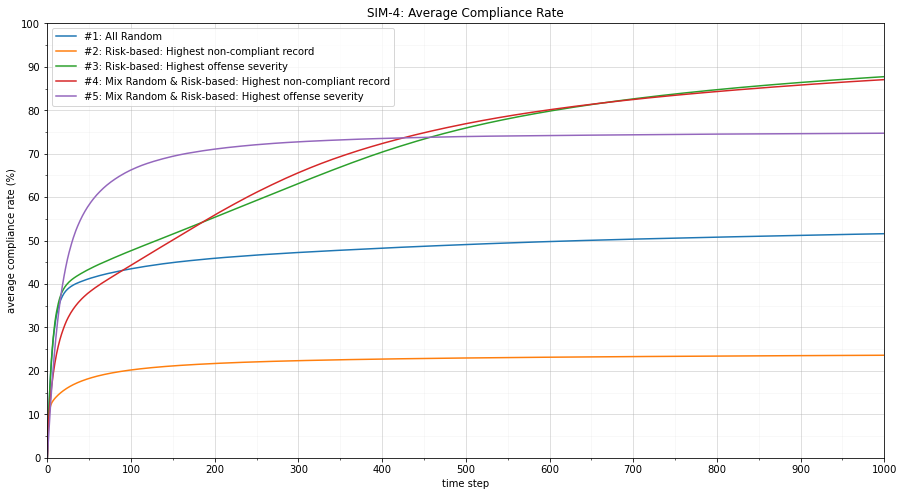

<Figure size 432x288 with 0 Axes>

In [7]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(sim4_random_step_mean['step'], sim4_random_step_mean['avg-compliance-rate-mean'],label="#1: All Random")
plt.plot(sim4_risknoncomp_step_mean['step'], sim4_risknoncomp_step_mean['avg-compliance-rate-mean'],label="#2: Risk-based: Highest non-compliant record")
plt.plot(sim4_riskoffense_step_mean['step'], sim4_riskoffense_step_mean['avg-compliance-rate-mean'],label="#3: Risk-based: Highest offense severity")
plt.plot(sim4_mixnoncomp_step_mean['step'], sim4_mixnoncomp_step_mean['avg-compliance-rate-mean'],label="#4: Mix Random & Risk-based: Highest non-compliant record")
plt.plot(sim4_mixoffense_step_mean['step'], sim4_mixoffense_step_mean['avg-compliance-rate-mean'],label="#5: Mix Random & Risk-based: Highest offense severity")

plt.title("SIM-4: Average Compliance Rate")
plt.xlabel('time step')
plt.ylabel('average compliance rate (%)')
plt.xlim(0,1000)
plt.ylim(0,100.1)

ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(True)
plt.legend()
#plt.legend(loc='center left', bbox_to_anchor=(.88, -.23))
plt.show()
plt.savefig('SIM-4 Avg Compliance Rate.png', dpi=300, bbox_inches='tight')

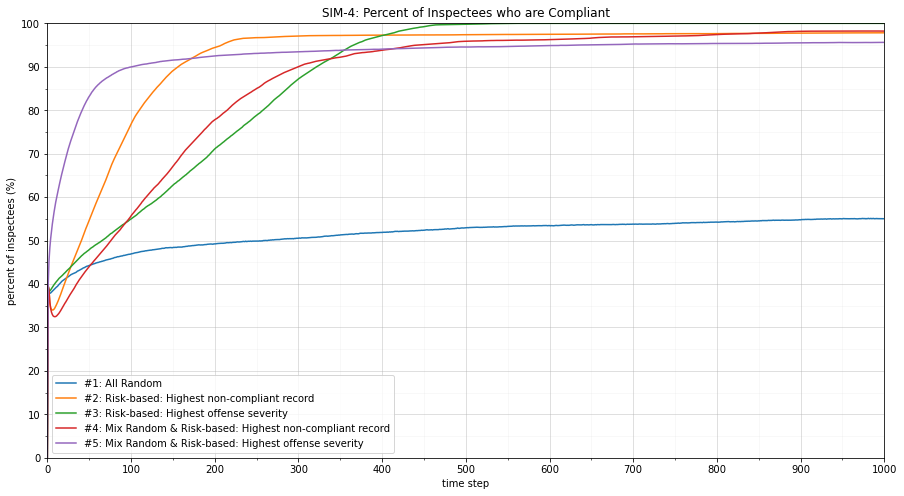

<Figure size 432x288 with 0 Axes>

In [9]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(sim4_random_step_mean['step'], sim4_random_step_mean['perc-compliant-mean'],label="#1: All Random")
plt.plot(sim4_risknoncomp_step_mean['step'], sim4_risknoncomp_step_mean['perc-compliant-mean'],label="#2: Risk-based: Highest non-compliant record")
plt.plot(sim4_riskoffense_step_mean['step'], sim4_riskoffense_step_mean['perc-compliant-mean'],label="#3: Risk-based: Highest offense severity")
plt.plot(sim4_mixnoncomp_step_mean['step'], sim4_mixnoncomp_step_mean['perc-compliant-mean'],label="#4: Mix Random & Risk-based: Highest non-compliant record")
plt.plot(sim4_mixoffense_step_mean['step'], sim4_mixoffense_step_mean['perc-compliant-mean'],label="#5: Mix Random & Risk-based: Highest offense severity")


plt.title("SIM-4: Percent of Inspectees who are Compliant")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,100.1)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(True)
plt.legend()
#plt.legend(loc='center left', bbox_to_anchor=(.88, -.23))
plt.show()
plt.savefig('SIM-4 Percent Compliant.png', dpi=300, bbox_inches='tight')

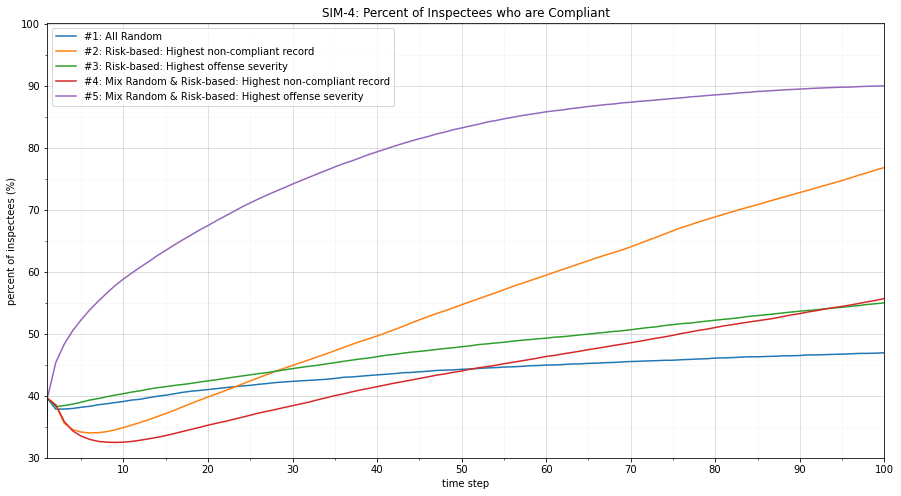

<Figure size 432x288 with 0 Axes>

In [10]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 100.1, 10))
ax.set_xticks(np.arange(0, 100.1, 5), minor=True)
ax.set_yticks(np.arange(30,100.1,10))
ax.set_yticks(np.arange(30,100.1,5), minor=True)

plt.plot(sim4_random_step_mean['step'], sim4_random_step_mean['perc-compliant-mean'],label="#1: All Random")
plt.plot(sim4_risknoncomp_step_mean['step'], sim4_risknoncomp_step_mean['perc-compliant-mean'],label="#2: Risk-based: Highest non-compliant record")
plt.plot(sim4_riskoffense_step_mean['step'], sim4_riskoffense_step_mean['perc-compliant-mean'],label="#3: Risk-based: Highest offense severity")
plt.plot(sim4_mixnoncomp_step_mean['step'], sim4_mixnoncomp_step_mean['perc-compliant-mean'],label="#4: Mix Random & Risk-based: Highest non-compliant record")
plt.plot(sim4_mixoffense_step_mean['step'], sim4_mixoffense_step_mean['perc-compliant-mean'],label="#5: Mix Random & Risk-based: Highest offense severity")


plt.title("SIM-4: Percent of Inspectees who are Compliant")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(1,100)
plt.ylim(30,100.1)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(True)
plt.legend()
#plt.legend(loc='center left', bbox_to_anchor=(.88, -.23))
plt.show()
plt.savefig('SIM-4 Percent Compliant (zoomed).png', dpi=300, bbox_inches='tight')

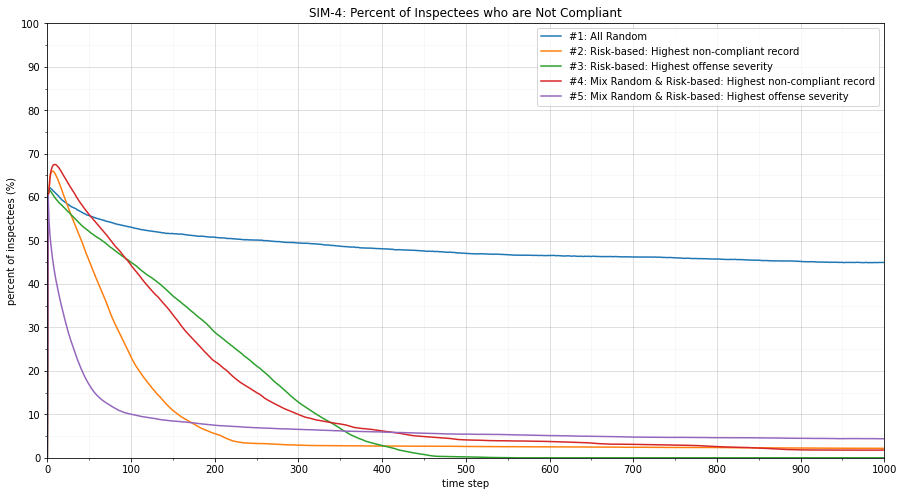

<Figure size 432x288 with 0 Axes>

In [9]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(sim4_random_step_mean['step'], sim4_random_step_mean['perc-noncompliant-mean'],label="#1: All Random")
plt.plot(sim4_risknoncomp_step_mean['step'], sim4_risknoncomp_step_mean['perc-noncompliant-mean'],label="#2: Risk-based: Highest non-compliant record")
plt.plot(sim4_riskoffense_step_mean['step'], sim4_riskoffense_step_mean['perc-noncompliant-mean'],label="#3: Risk-based: Highest offense severity")
plt.plot(sim4_mixnoncomp_step_mean['step'], sim4_mixnoncomp_step_mean['perc-noncompliant-mean'],label="#4: Mix Random & Risk-based: Highest non-compliant record")
plt.plot(sim4_mixoffense_step_mean['step'], sim4_mixoffense_step_mean['perc-noncompliant-mean'],label="#5: Mix Random & Risk-based: Highest offense severity")


plt.title("SIM-4: Percent of Inspectees who are Not Compliant")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,100.1)

ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(True)
plt.legend()
#plt.legend(loc='center left', bbox_to_anchor=(.88, -.23))
plt.show()
plt.savefig('SIM-4 Percent Not Compliant.png', dpi=300, bbox_inches='tight')

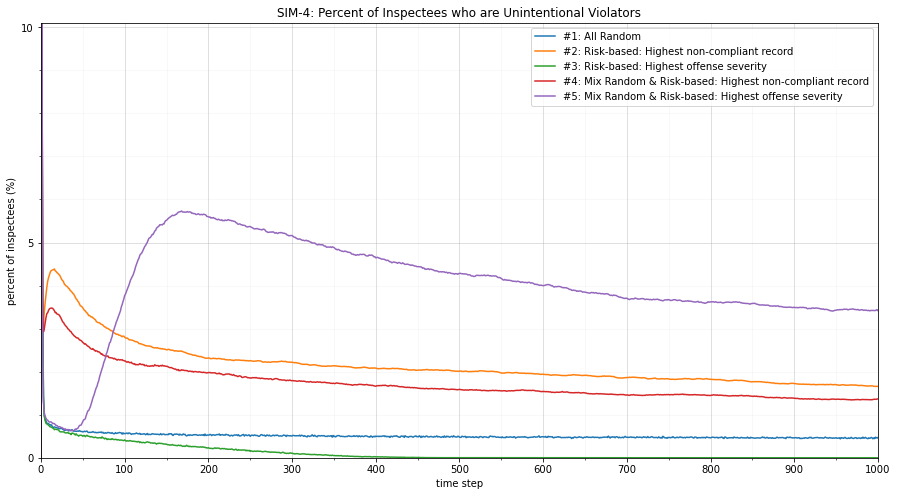

<Figure size 432x288 with 0 Axes>

In [10]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,10.1,5))
ax.set_yticks(np.arange(0,10.1,1), minor=True)

plt.plot(sim4_random_step_mean['step'], sim4_random_step_mean['perc-unintentional-mean'],label="#1: All Random")
plt.plot(sim4_risknoncomp_step_mean['step'], sim4_risknoncomp_step_mean['perc-unintentional-mean'],label="#2: Risk-based: Highest non-compliant record")
plt.plot(sim4_riskoffense_step_mean['step'], sim4_riskoffense_step_mean['perc-unintentional-mean'],label="#3: Risk-based: Highest offense severity")
plt.plot(sim4_mixnoncomp_step_mean['step'], sim4_mixnoncomp_step_mean['perc-unintentional-mean'],label="#4: Mix Random & Risk-based: Highest non-compliant record")
plt.plot(sim4_mixoffense_step_mean['step'], sim4_mixoffense_step_mean['perc-unintentional-mean'],label="#5: Mix Random & Risk-based: Highest offense severity")


plt.title("SIM-4: Percent of Inspectees who are Unintentional Violators")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,10.1)

ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(True)
plt.legend()
#plt.legend(loc='center left', bbox_to_anchor=(.88, -.23))
plt.show()
plt.savefig('SIM-4 Percent Unintentional.png', dpi=300, bbox_inches='tight')

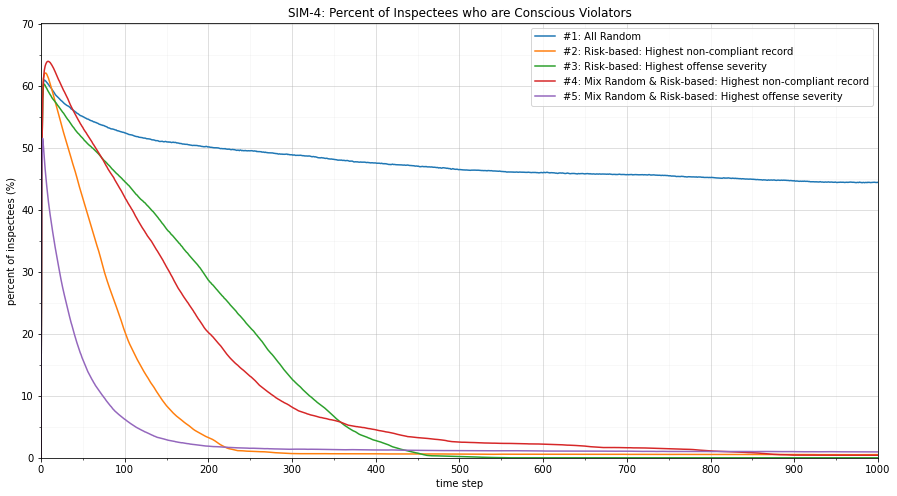

<Figure size 432x288 with 0 Axes>

In [11]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,100.1,10))
ax.set_yticks(np.arange(0,100.1,5), minor=True)

plt.plot(sim4_random_step_mean['step'], sim4_random_step_mean['perc-conscious-mean'],label="#1: All Random")
plt.plot(sim4_risknoncomp_step_mean['step'], sim4_risknoncomp_step_mean['perc-conscious-mean'],label="#2: Risk-based: Highest non-compliant record")
plt.plot(sim4_riskoffense_step_mean['step'], sim4_riskoffense_step_mean['perc-conscious-mean'],label="#3: Risk-based: Highest offense severity")
plt.plot(sim4_mixnoncomp_step_mean['step'], sim4_mixnoncomp_step_mean['perc-conscious-mean'],label="#4: Mix Random & Risk-based: Highest non-compliant record")
plt.plot(sim4_mixoffense_step_mean['step'], sim4_mixoffense_step_mean['perc-conscious-mean'],label="#5: Mix Random & Risk-based: Highest offense severity")


plt.title("SIM-4: Percent of Inspectees who are Conscious Violators")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,70.1)

ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(True)
plt.legend()
#plt.legend(loc='center left', bbox_to_anchor=(.88, -.23))
plt.show()
plt.savefig('SIM-4 Percent Conscious.png', dpi=300, bbox_inches='tight')

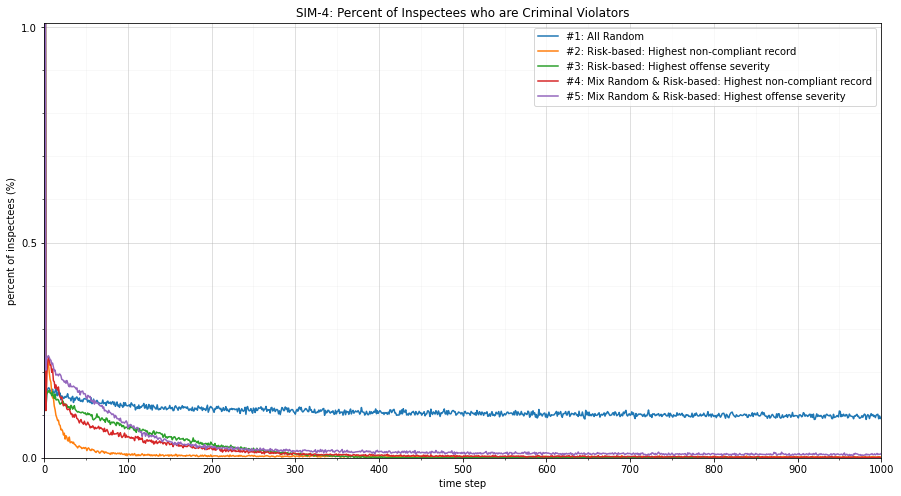

<Figure size 432x288 with 0 Axes>

In [12]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 1000.1, 100))
ax.set_xticks(np.arange(0, 1000.1, 50), minor=True)
ax.set_yticks(np.arange(0,1.01,.5))
ax.set_yticks(np.arange(0,1.01,.1), minor=True)

plt.plot(sim4_random_step_mean['step'], sim4_random_step_mean['perc-criminal-mean'],label="#1: All Random")
plt.plot(sim4_risknoncomp_step_mean['step'], sim4_risknoncomp_step_mean['perc-criminal-mean'],label="#2: Risk-based: Highest non-compliant record")
plt.plot(sim4_riskoffense_step_mean['step'], sim4_riskoffense_step_mean['perc-criminal-mean'],label="#3: Risk-based: Highest offense severity")
plt.plot(sim4_mixnoncomp_step_mean['step'], sim4_mixnoncomp_step_mean['perc-criminal-mean'],label="#4: Mix Random & Risk-based: Highest non-compliant record")
plt.plot(sim4_mixoffense_step_mean['step'], sim4_mixoffense_step_mean['perc-criminal-mean'],label="#5: Mix Random & Risk-based: Highest offense severity")


plt.title("SIM-4: Percent of Inspectees who are Criminal Violators")
plt.xlabel('time step')
plt.ylabel('percent of inspectees (%)')
plt.xlim(0,1000)
plt.ylim(0,1.01)

ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.5)
plt.grid(True)
plt.legend()
#plt.legend(loc='center left', bbox_to_anchor=(.88, -.23))
plt.show()
plt.savefig('SIM-4 Percent Criminal.png', dpi=300, bbox_inches='tight')